In [507]:
import sys
import os
import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import mpl_toolkits.axisartist
# from mpl_toolkits.axes_grid1 import host_subplot

import scipy.interpolate
import scipy.optimize
import scipy.stats
import pandas as pd

# import statsmodels.formula.api as smformula
# import dateutil
# from collections import OrderedDict

from IPython.display import display, HTML
%matplotlib notebook
plt.style.use('seaborn-paper')

# special-ish extensions
# %load_ext Cython

In [9]:
# constants
FN = '2017_MAT_rep{}data.xlsx'
treatments = ['Low', 'High', 'Super High']

In [226]:
def load_rep_catch_data(rep, filename_pattern):
    df = pd.read_excel(filename_pattern.format(rep))

    if rep in [1,2]:
        foo = df[['Date Collected','Treatment','Row','Trap #','Pink','Blue','Yellow','Arc Yellow']].copy(deep=True)
        foo = foo[pd.notnull(foo['Date Collected'])]
        foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']] = foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']].fillna(value=0)
        foo['Total'] = foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']].sum(axis=1)
    else:
        foo = df[['Date','Treatment','Row','Trap #','# recaptured']].copy(deep=True)
        foo.rename(columns={'Date':'Date Collected', '# recaptured':'Total'}, inplace=True)
        foo = foo[pd.notnull(foo['Date Collected'])]
        foo['Total'] = foo['Total'].fillna(value=0)

    return foo

## Trap locations

In [284]:
COLSPACE = 4.5 # distance between trees along a row
ROWSPACE = 8.5 # distance between rows

FIRST_ROW_BREAK_DIST = 40 # distance between traps 4 and 5 on first row 

# Trap x positions
# even rows (starting with 0)
tx0 = (np.linspace(0, 90, 4)+15)*COLSPACE
tx0 = np.concatenate((tx0, [0*COLSPACE, 30*COLSPACE]+tx0[-1]+FIRST_ROW_BREAK_DIST*COLSPACE))
# odd rows
tx1 = (np.linspace(0, 90, 4)+30)*COLSPACE
tx1 = np.concatenate((tx1, [0*COLSPACE]+tx1[-1]+FIRST_ROW_BREAK_DIST*COLSPACE))

# nominal trap positions
tx = []
ty = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        tx.extend(tx0)
        ty.extend([row*ROWSPACE]*len(tx0))
    else:
        tx.extend(tx1)
        ty.extend([row*ROWSPACE]*len(tx1))

# high block positions
hbx = []
hby = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        hbx.extend(tx1)
        hby.extend([row*ROWSPACE]*len(tx1))
    else:
        hbx.extend(tx0)
        hby.extend([row*ROWSPACE]*len(tx0))

# super-high block positions
tmp = np.linspace(0, 120*COLSPACE, 17)
#tmp = tmp*COLSPACE
shbx0 = np.concatenate((tmp, np.linspace(0,30*COLSPACE,5)+(105*COLSPACE+FIRST_ROW_BREAK_DIST*COLSPACE)))
shbx0 = shbx0[np.in1d(shbx0, tx0, invert=True)]
shbx1 = np.concatenate((tmp+7.5*COLSPACE, np.linspace(0,30*COLSPACE,5)+(105*COLSPACE+FIRST_ROW_BREAK_DIST*COLSPACE)))
# shbx1 = np.concatenate((tmp+7.5*COLSPACE, np.linspace(0,30,5)+(105+FIRST_ROW_BREAK_DIST)))
shbx1 = shbx1[np.in1d(shbx1, tx1, invert=True)]
shbx = []
shby = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        shbx.extend(shbx0)
        shby.extend([row*ROWSPACE]*len(shbx0))
    else:
        shbx.extend(shbx1)
        shby.extend([row*ROWSPACE]*len(shbx1))


<IPython.core.display.Javascript object>


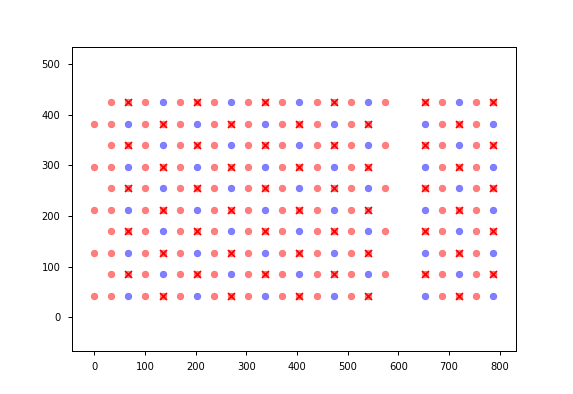

In [285]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(tx, ty, color='b', alpha=0.5)
ax.scatter(hbx, hby, marker='x', color='r')
ax.scatter(shbx, shby, color='r', alpha=0.5)
ax.set_aspect('equal','datalim')

<IPython.core.display.Javascript object>


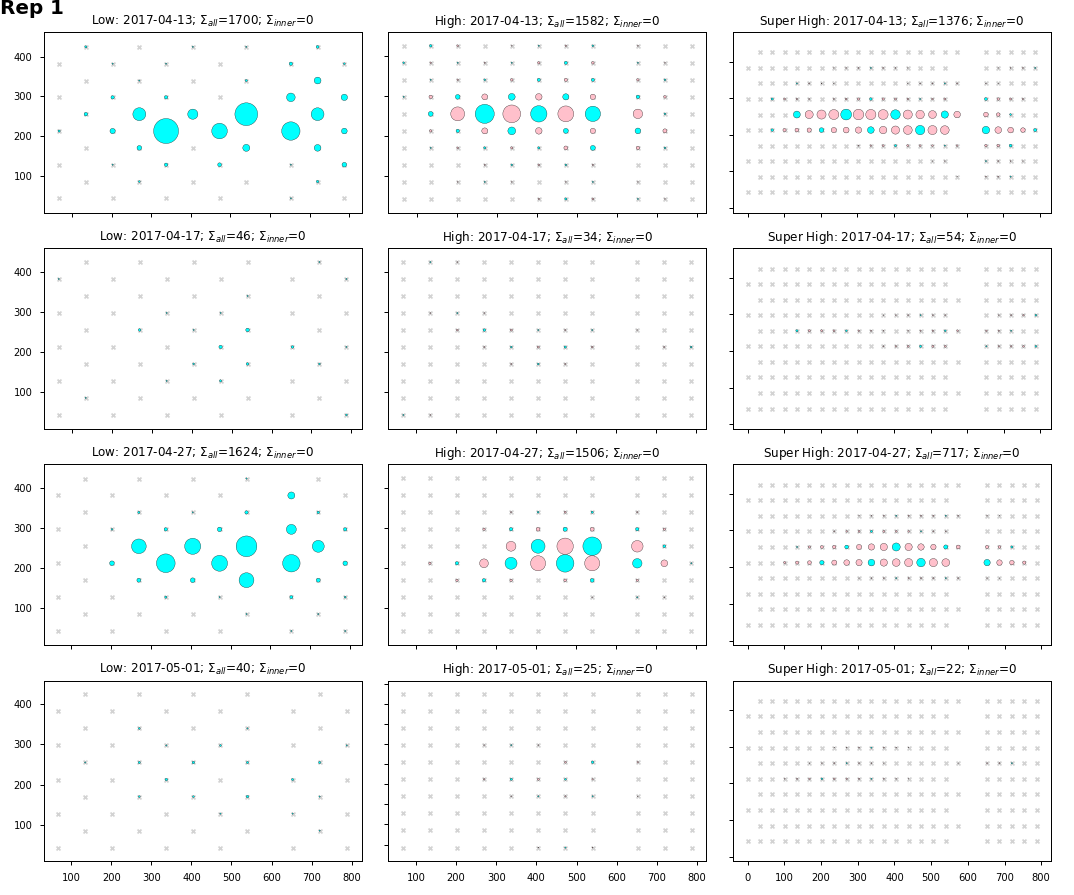

Low: 2017-04-13; $\Sigma_{all}$=1700; $\Sigma_{inner}$=0
Low: 2017-04-17; $\Sigma_{all}$=46; $\Sigma_{inner}$=0
Low: 2017-04-27; $\Sigma_{all}$=1624; $\Sigma_{inner}$=0
Low: 2017-05-01; $\Sigma_{all}$=40; $\Sigma_{inner}$=0
High: 2017-04-13; $\Sigma_{all}$=1582; $\Sigma_{inner}$=0
High: 2017-04-17; $\Sigma_{all}$=34; $\Sigma_{inner}$=0
High: 2017-04-27; $\Sigma_{all}$=1506; $\Sigma_{inner}$=0
High: 2017-05-01; $\Sigma_{all}$=25; $\Sigma_{inner}$=0
Super High: 2017-04-13; $\Sigma_{all}$=1376; $\Sigma_{inner}$=0
Super High: 2017-04-17; $\Sigma_{all}$=54; $\Sigma_{inner}$=0
Super High: 2017-04-27; $\Sigma_{all}$=717; $\Sigma_{inner}$=0
Super High: 2017-05-01; $\Sigma_{all}$=22; $\Sigma_{inner}$=0


<IPython.core.display.Javascript object>


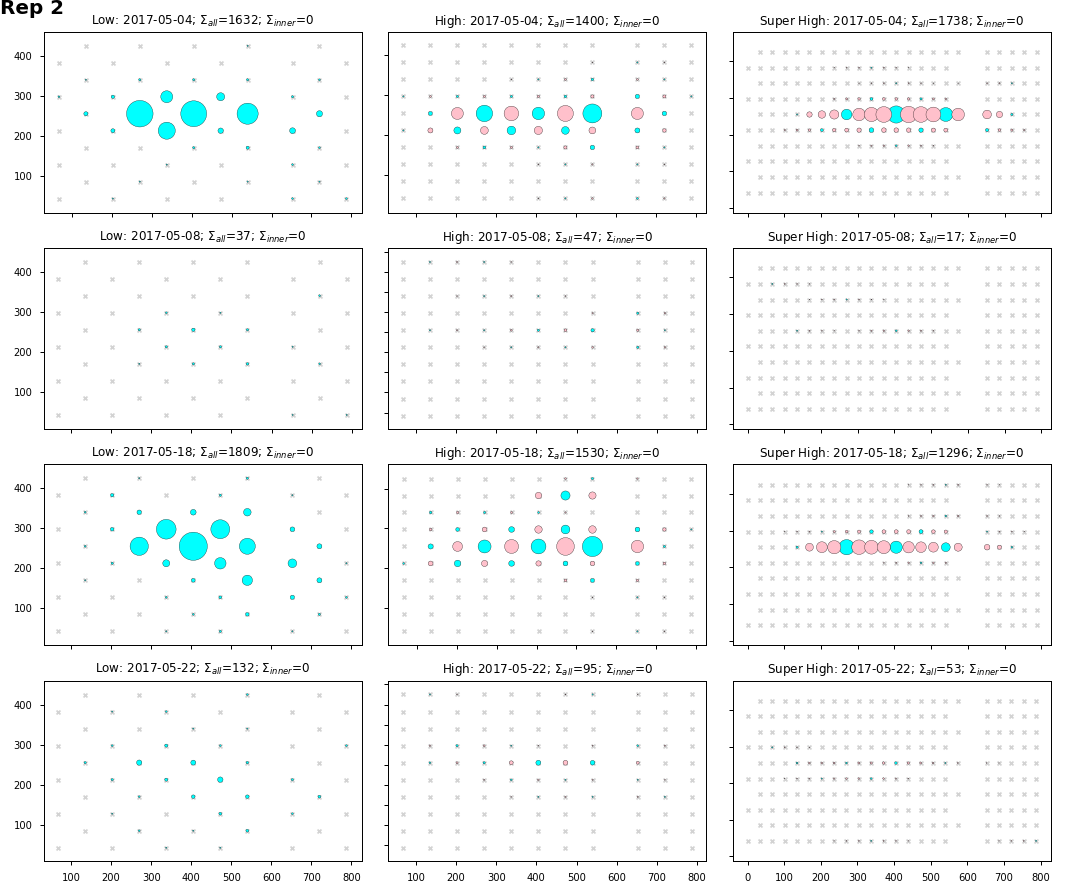

Low: 2017-05-04; $\Sigma_{all}$=1632; $\Sigma_{inner}$=0
Low: 2017-05-08; $\Sigma_{all}$=37; $\Sigma_{inner}$=0
Low: 2017-05-18; $\Sigma_{all}$=1809; $\Sigma_{inner}$=0
Low: 2017-05-22; $\Sigma_{all}$=132; $\Sigma_{inner}$=0
High: 2017-05-04; $\Sigma_{all}$=1400; $\Sigma_{inner}$=0
High: 2017-05-08; $\Sigma_{all}$=47; $\Sigma_{inner}$=0
High: 2017-05-18; $\Sigma_{all}$=1530; $\Sigma_{inner}$=0
High: 2017-05-22; $\Sigma_{all}$=95; $\Sigma_{inner}$=0
Super High: 2017-05-04; $\Sigma_{all}$=1738; $\Sigma_{inner}$=0
Super High: 2017-05-08; $\Sigma_{all}$=17; $\Sigma_{inner}$=0
Super High: 2017-05-18; $\Sigma_{all}$=1296; $\Sigma_{inner}$=0
Super High: 2017-05-22; $\Sigma_{all}$=53; $\Sigma_{inner}$=0


<IPython.core.display.Javascript object>


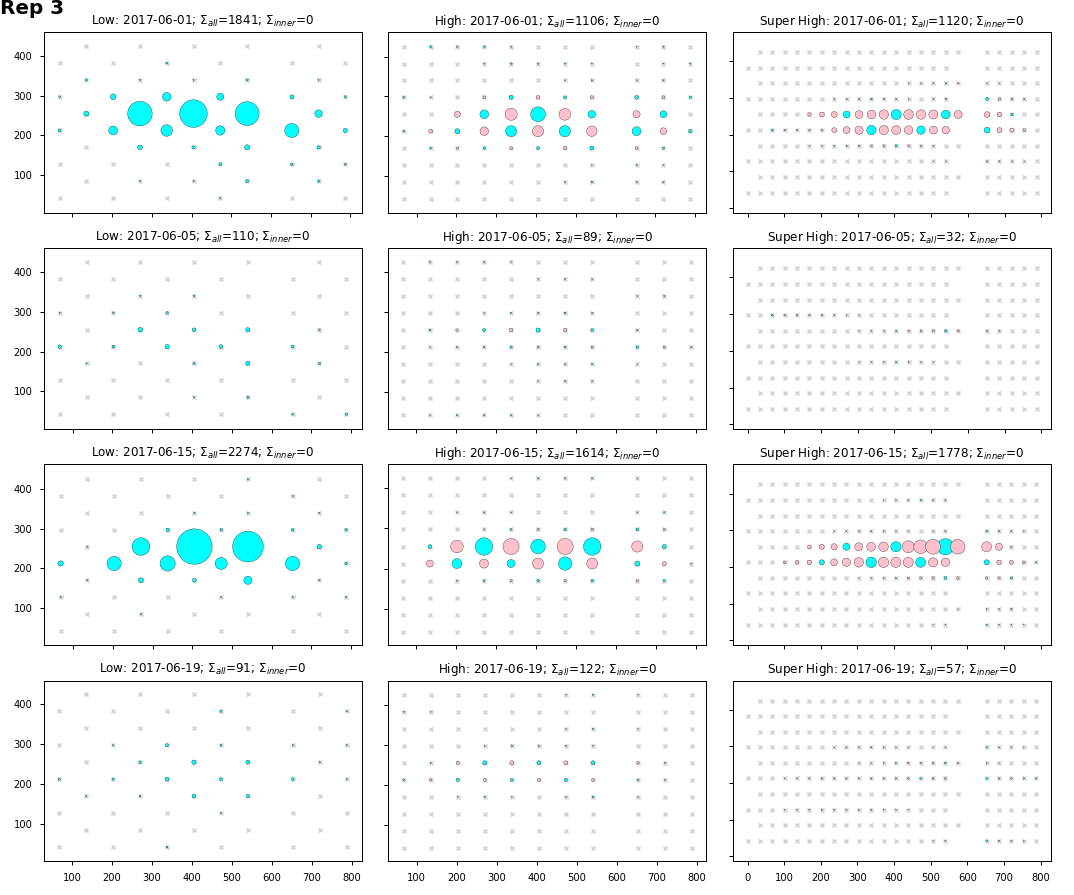

Low: 2017-06-01; $\Sigma_{all}$=1841; $\Sigma_{inner}$=0
Low: 2017-06-05; $\Sigma_{all}$=110; $\Sigma_{inner}$=0
Low: 2017-06-15; $\Sigma_{all}$=2274; $\Sigma_{inner}$=0
Low: 2017-06-19; $\Sigma_{all}$=91; $\Sigma_{inner}$=0
High: 2017-06-01; $\Sigma_{all}$=1106; $\Sigma_{inner}$=0
High: 2017-06-05; $\Sigma_{all}$=89; $\Sigma_{inner}$=0
High: 2017-06-15; $\Sigma_{all}$=1614; $\Sigma_{inner}$=0
High: 2017-06-19; $\Sigma_{all}$=122; $\Sigma_{inner}$=0
Super High: 2017-06-01; $\Sigma_{all}$=1120; $\Sigma_{inner}$=0
Super High: 2017-06-05; $\Sigma_{all}$=32; $\Sigma_{inner}$=0
Super High: 2017-06-15; $\Sigma_{all}$=1778; $\Sigma_{inner}$=0
Super High: 2017-06-19; $\Sigma_{all}$=57; $\Sigma_{inner}$=0


In [292]:
innerx0 = tx0[2]*COLSPACE # incluse
innerx1 = tx0[3]*COLSPACE # not inclusive

treatments = ['Low', 'High', 'Super High']

for rep in [1,2,3]:
    df = load_rep_catch_data(rep, FN)
    # and x,y cols for positions
    df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                       if int(r['Row']%10) == 5
                       else tx1[int(r['Trap #'])-1],
                       axis=1) 
    df['y'] = df['Row'] * ROWSPACE
#     df['x'] = df['x'] * COLSPACE
    
    fig = plt.figure(figsize=(12,10))
    gs = mpl.gridspec.GridSpec(4,len(treatments))

    for ti, treatment in enumerate(treatments):
        tmp = df[df['Treatment'] == treatment]
        service_dates = pd.to_datetime(tmp['Date Collected'].unique())
        assert len(service_dates) == 4

        if treatment == 'High':
            bx = hbx
            by = hby
        elif treatment == 'Super High':
            bx = shbx
            by = shby
        else:
            assert treatment == 'Low'
            bx = []
            by = []
            
        for di, service_date in enumerate(service_dates):
            foo = df[df['Treatment'] == treatment].copy(deep=True)
            foo = foo[foo['Date Collected'] == service_date]

            foo['isTrap'] = True
            foo_traps = foo.copy(deep=True) # keep a copy of just the traps
            
            # Add in the blocks
            foo = foo.append(pd.DataFrame({'x':bx, 'y':by}),
                       ignore_index=True)
            foo.sort_values(['y','x'], inplace=True)
            foo.reset_index(inplace=True, drop=True)
            
            # interpolate
            ## 1D (row wise) interpolation
            out = foo.copy(deep=True)
            out['iT'] = np.nan
            for row in sorted(foo['y'].unique()):
                tmp = foo[foo['y']==row].sort_values('x')
                tmp2 = tmp.dropna(subset=['Total'])
                iT = scipy.interpolate.interp1d(tmp2['x'], tmp2['Total'], 
                                                kind='linear', copy=True, bounds_error=False, 
                                                fill_value=np.nan, assume_sorted=False)(tmp['x'])
                out.loc[tmp.index,'iT'] = iT
                
            # sums
            tmp = out#.copy(deep=True)
            sum_all = tmp['iT'].sum()
            tmp = tmp[(tmp['x']>=innerx0) & (tmp['x']<innerx1)] # restrict to inner columns
            #tmp = tmp[(tmp['y']>=25) & (tmp['y']<=30)] # restrict rows too?
            sum_inner_cols = tmp['iT'].sum()
            
            # Plot
            ax = fig.add_subplot(gs[di,ti])
            # all traps+hats (markers)
            ax.scatter(x=out['x'], y=out['y'], s=10, marker='x', color='lightgray')

            # inner
            tmp1 = out[(out['x']>=innerx0) & (out['x']<innerx1)]
            tmp = tmp1[tmp1['isTrap']==True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='b', edgecolor='k')
            tmp = tmp1[tmp1['isTrap']!=True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='r', edgecolor='k')
            
            # non inner
            tmp2 = out.loc[out.index.difference(tmp1.index)]
            tmp = tmp2[tmp2['isTrap']==True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='cyan', edgecolor='k')
            tmp = tmp2[tmp2['isTrap']!=True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='pink', edgecolor='k')

            ax.set_aspect('equal','datalim')
            
            t = "{}: {}".format(treatment, pd.to_datetime(service_date).strftime('%Y-%m-%d'))
            t += r"; $\Sigma_{all}$="+str(int(sum_all))
            t += r"; $\Sigma_{inner}$="+str(int(sum_inner_cols))
            ax.set_title(t)
            print(t)

            if ti>0:
                ax.set_yticklabels([])
            if di<len(service_dates)-1:
                ax.set_xticklabels([])
            
#             break
#         break
                
    ax.text(0,1, 'Rep {}'.format(rep), transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left')

    # gs.tight_layout(fig, rect=[])
    fig.tight_layout()

    fig.savefig('rep{}_inferred.png'.format(rep))
#     break

DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)

<IPython.core.display.Javascript object>


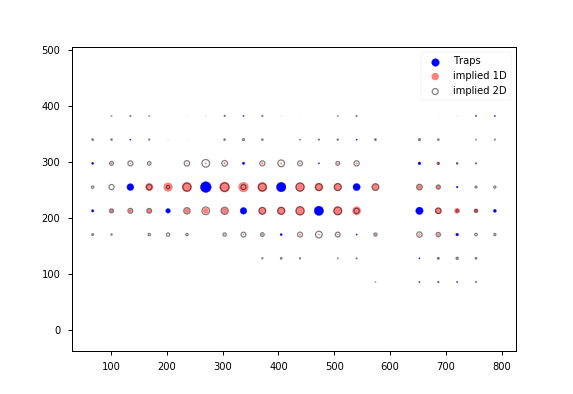

In [295]:
# Interploation... 1D vs 2D
# 2D doesn't make sense here, but is interesting comparison and useful for future point release work
rep = 1
treatment = 'Super High'
service_number = 0

df = load_rep_catch_data(rep, FN)
df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                   if int(r['Row']%10) == 5
                   else tx1[int(r['Trap #'])-1],
                   axis=1) 
df['y'] = df['Row'] * ROWSPACE

tmp = df[df['Treatment'] == treatment]
service_dates = pd.to_datetime(tmp['Date Collected'].unique())
display(service_dates)
service_date = service_dates[service_number]
tmp = tmp[tmp['Date Collected'] == service_date]

# plot traps
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
x = tmp['x']
y = tmp['y']
z = tmp['Total']
ax.scatter(x, y, z, color='b', label='Traps')


### Blocks
if treatment.lower() == 'low':
    bx = []
    by = []
elif treatment.lower() == 'high':
    bx = hbx
    by = hby
elif treatment.lower() == 'super high':
    bx = shbx
    by = shby
else:
    raise RuntimeError("don't understand treatment='{}'".format(treatment))
foo = tmp.copy(deep=True)
foo['isTrap'] = True
foo = foo.append(pd.DataFrame({'x':bx, 'y':by}),
           ignore_index=True)
foo.sort_values(['y','x'], inplace=True)
foo.reset_index(inplace=True, drop=True)

# interpolate
## 1D (row wise) interpolation
out = foo.copy(deep=True)
foo['iT'] = np.nan
for row in sorted(foo['y'].unique()):
    tmp = foo[foo['y']==row].sort_values('x')
    tmp2 = tmp.dropna(subset=['Total'])
    iT = scipy.interpolate.interp1d(tmp2['x'], tmp2['Total'], 
                                    kind='linear', copy=True, bounds_error=False, 
                                    fill_value=np.nan, assume_sorted=False)(tmp['x'])
    foo.loc[tmp.index,'implied catch 1D'] = iT

# 2D interploation... Doesn't seem to make sense for transect release
# @TCC Doesn't seem to work for the cross-transect nature of the data (y and x distances aren't equivalent)
# uses x,y,z for traps only computed above
foo['implied catch 2D'] = scipy.interpolate.griddata(list(zip(x,y)),z, 
                                list(zip(foo['x'],foo['y'])),
                                method='linear', fill_value=np.nan, rescale=False)

# plot just the blocks
t2 = foo[foo['isTrap']!=True]
ax.scatter(t2['x'], t2['y'], t2['implied catch 1D'], color='r', alpha=0.5, edgecolor='none', linewidths=1, label='implied 1D')
ax.scatter(t2['x'], t2['y'], t2['implied catch 2D'], color='none', alpha=0.5, edgecolor='k', linewidths=1, label='implied 2D')
ax.set_aspect('equal','datalim')
ax.legend()

## Distribution of catch vs distance from transect

In [349]:
# Load data and filter down to single service (collection date)
rep = 1
treatment = 'Low'
service_number = 0

df = load_rep_catch_data(rep, FN)
df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                   if int(r['Row']%10) == 5
                   else tx1[int(r['Trap #'])-1],
                   axis=1) 
df['y'] = df['Row'] * ROWSPACE

df = df[df['Treatment'] == treatment]
service_dates = pd.to_datetime(df['Date Collected'].unique())
print("Service Dates:", service_dates) # just informative output
service_date = service_dates[service_number]
df = df[df['Date Collected'] == service_date]

df['rel catch'] = df['Total']/df['Total'].sum()

Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)


<IPython.core.display.Javascript object>


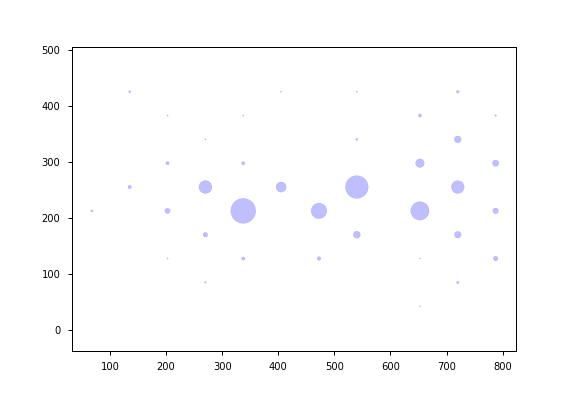

In [350]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
x = df['x']
y = df['y']
z = df['Total']
ax.scatter(x, y, z, color='b', alpha=0.25, label='Traps')
ax.set_aspect('equal','datalim')

<IPython.core.display.Javascript object>


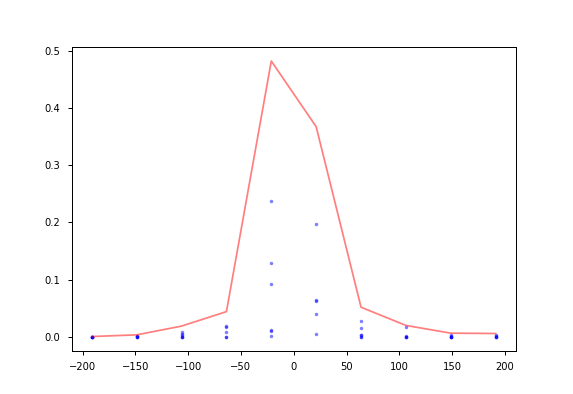

In [351]:
release_y = 27.5*ROWSPACE

df['dy'] = df['y']-release_y

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.plot(df['dy'], df['rel catch'], '.', alpha=0.5, color='b')

cdy = df.groupby('dy')['rel catch'].sum()
ax.plot(cdy.index, cdy, 'r-', alpha=0.5)

<IPython.core.display.Javascript object>


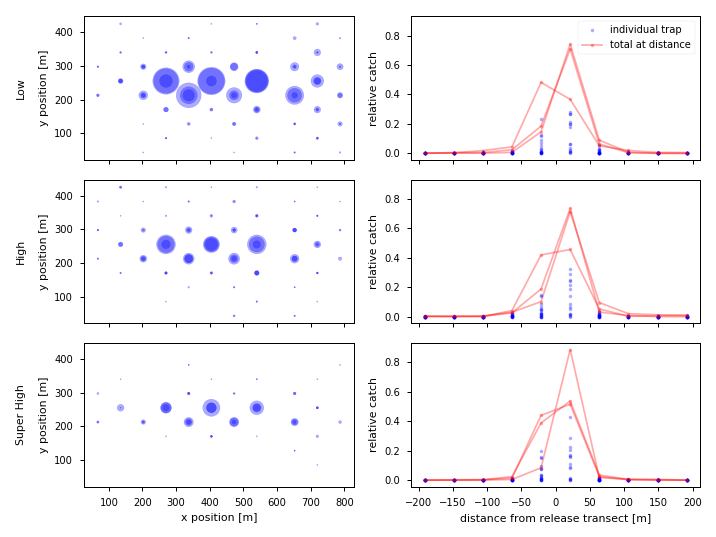

Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-06-01', '2017-06-05', '2017-06-15', '2017-06-19'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-06-01', '2017-06-05', '2017-06-15', '2017-06-19'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeI

In [354]:
# Load data and filter down to single service (collection date)
treatments = ['Low', 'High', 'Super High']
reps = [1,2,3]
service_number = 0
release_y = 27.5 * ROWSPACE

fig = plt.figure(figsize=[8,6])
#gs = mpl.gridspec.GridSpec(len(treatments),2)
axs = fig.subplots(len(treatments), 2, sharex='col', sharey='col')

for ti, treatment in enumerate(treatments):
    for rep in reps:
        
        df = load_rep_catch_data(rep, FN)
        df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                           if int(r['Row']%10) == 5
                           else tx1[int(r['Trap #'])-1],
                           axis=1) 
        df['y'] = df['Row'] * ROWSPACE
#         full_df = df.copy()
#         df = full_df.copy()

        df = df[df['Treatment'] == treatment]
        service_dates = pd.to_datetime(df['Date Collected'].unique())
        print("Service Dates:", service_dates) # just informative output
        service_date = service_dates[service_number]
        df = df[df['Date Collected'] == service_date]

        df['rel catch'] = df['Total']/df['Total'].sum()
        df['dy'] = df['y']-release_y
        cdy = df.groupby('dy')['rel catch'].sum()

        ax = axs[ti,0]
        ax.scatter(df['x'], df['y'], df['Total'], color='b', alpha=0.33, label='trap catch')
        ax.set_aspect('equal')
        ax.set_ylabel('{}\n\ny position [m]'.format(treatment))

        ax = axs[ti,1]
        tmp, = ax.plot(df['dy'], df['rel catch'], '.', alpha=0.33, color='b', label='')
        if rep == reps[0]: tmp.set_label('individual trap')
        tmp, = ax.plot(cdy.index, cdy, 'r.-', alpha=0.33, label='')
        if rep == reps[0]: tmp.set_label('total at distance')
        ax.set_ylabel('relative catch')
    
axs[0,1].legend()
axs[-1,0].set_xlabel('x position [m]')
axs[-1,1].set_xlabel('distance from release transect [m]')

fig.tight_layout()


In [355]:
### Averaging the 3 reps

<IPython.core.display.Javascript object>


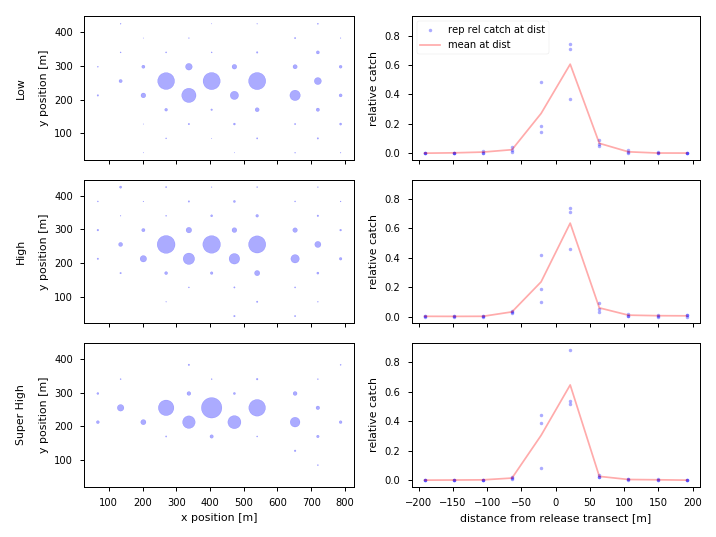

Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-06-01', '2017-06-05', '2017-06-15', '2017-06-19'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-06-01', '2017-06-05', '2017-06-15', '2017-06-19'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-04-13', '2017-04-17', '2017-04-27', '2017-05-01'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeIndex(['2017-05-04', '2017-05-08', '2017-05-18', '2017-05-22'], dtype='datetime64[ns]', freq=None)
Service Dates: DatetimeI

In [455]:
# Load data and filter down to single service (collection date)
treatments = ['Low', 'High', 'Super High']
reps = [1,2,3]
service_number = 0
release_y = 27.5 * ROWSPACE
SCATTER_MARKER_SCALE = 1000

fig = plt.figure(figsize=[8,6])
axs = fig.subplots(len(treatments), 2, sharex='col', sharey='col', squeeze=False)

dys_by_treatment = {}
for ti, treatment in enumerate(treatments):
    dys = None
    sc = None
    for rep in reps:
        df = load_rep_catch_data(rep, FN)
        df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                           if int(r['Row']%10) == 5
                           else tx1[int(r['Trap #'])-1],
                           axis=1) 
        df['y'] = df['Row'] * ROWSPACE
        df = df[df['Treatment'] == treatment]
        service_dates = pd.to_datetime(df['Date Collected'].unique())
        print("Service Dates:", service_dates) # just informative output
        service_date = service_dates[service_number]
        df = df[df['Date Collected'] == service_date]

        df['rel catch'] = df['Total']/df['Total'].sum()
        df['dy'] = df['y']-release_y
        cdy = df.groupby('dy')['rel catch'].sum()
        cdy.name = rep

        if dys is None:
            dys = cdy.to_frame()
            sc = df.copy().loc[:,['x','y','rel catch','dy']]
            sc.rename(columns={'rel catch':'rel catch{}'.format(rep)}, inplace=True)
        else:
            dys = dys.join(cdy.to_frame(), how='outer')
            sc = sc.merge(df.loc[:,['x','y','rel catch']].rename(columns={'rel catch':'rel catch{}'.format(rep)}),
                          how='outer', left_on=['x','y'], right_on=['x','y'], suffixes=['',rep])

    sc['mean'] = sc.loc[:,sc.columns.str.startswith('rel catch')].mean(axis=1)
    dys_by_treatment[treatment] = dys.copy()

    ax = axs[ti,0]
    ax.scatter(sc['x'], sc['y'], sc['mean']*SCATTER_MARKER_SCALE, color='b', alpha=0.33, label='mean relative trap catch')
    ax.set_aspect('equal')
    ax.set_ylabel('{}\n\ny position [m]'.format(treatment))

    ax = axs[ti,1]
    for rep in reps:
        tmp, = ax.plot(dys.index, dys.loc[:,rep], '.', alpha=0.33, color='b', label='')
        if rep == reps[0]: tmp.set_label('rep rel catch at dist')
    ax.plot(dys.index, dys.mean(axis=1), 'r-', alpha=0.33, label='mean at dist')
    ax.set_ylabel('relative catch')

axs[0,1].legend()
axs[-1,0].set_xlabel('x position [m]')
axs[-1,1].set_xlabel('distance from release transect [m]')

fig.tight_layout()

In [456]:
dys_by_treatment

{'High':                 1         2         3
 dy                                   
 -191.25  0.004950  0.004161  0.000000
 -148.75  0.002475  0.000000  0.005291
 -106.25  0.004950  0.002774  0.001764
 -63.75   0.030941  0.026352  0.042328
 -21.25   0.102723  0.188627  0.419753
  21.25   0.714109  0.736477  0.456790
  63.75   0.096535  0.031900  0.052910
  106.25  0.021040  0.008322  0.003527
  148.75  0.013614  0.001387  0.007055
  191.25  0.008663  0.000000  0.010582,
 'Low':                 1         2         3
 dy                                   
 -191.25  0.000588  0.003064  0.000543
 -148.75  0.003529  0.001838  0.005975
 -106.25  0.018824  0.001838  0.005975
 -63.75   0.044118  0.006740  0.024443
 -21.25   0.481765  0.146446  0.185225
  21.25   0.367059  0.742034  0.708311
  63.75   0.051765  0.090074  0.063552
  106.25  0.020000  0.007353  0.004889
  148.75  0.006471  0.000000  0.001086
  191.25  0.005882  0.000613  0.000000,
 'Super High':                 1         2     

In [544]:

d

,dy,rep,rc
0,-191.25,1,0.000588
1,-191.25,2,0.003064
2,-191.25,3,0.000543
3,-148.75,1,0.003529
4,-148.75,2,0.001838
5,-148.75,3,0.005975
6,-106.25,1,0.018824
7,-106.25,2,0.001838
8,-106.25,3,0.005975
9,-63.75,1,0.044118


<IPython.core.display.Javascript object>


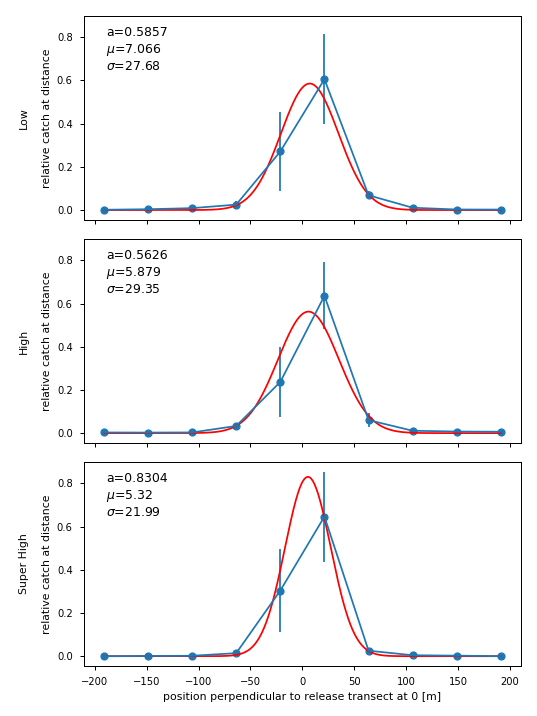

Low [  0.58570288   7.06585472  27.68245046]
High [  0.56255997   5.87885532  29.35313084]
Super High [  0.83037294   5.31951724  21.9924113 ]


In [663]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
	a, b, c = p # b=mu, c=sigma (could also add d)
	y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.))# + d
	return y

treatments = ['Low', 'High', 'Super High']

fig = plt.figure(figsize=[6,8])
axs = fig.subplots(len(treatments), 1, sharex='col', sharey='col', squeeze=False)

for ti, treatment in enumerate(treatments):
    d = dys_by_treatment[treatment]
    d = d.stack().reset_index()
    d.rename(columns={'level_1':'rep', 0:'rc'}, inplace=True)

    N = 1000
    gb = d.groupby('dy')
    tmp = gb.mean()['rc']
    x = tmp.index.values
    y = tmp.values
    e = gb.std()['rc'].values

    y[y==0] = np.finfo(float).eps
    e[e==0] = np.finfo(float).eps
    
#     p_initial = [ 1,   5.87885532,  29.35313084]
    p_initial = [.1, (d['dy']*d['rc']).mean(), (d['dy']*d['rc']).std()]

    # Use curve_fit to fit
    popt, pcov = scipy.optimize.curve_fit(gauss, x, y, sigma=e, absolute_sigma=True, p0=p_initial, maxfev=1000)

    # Generate y-data based on the fit
    y_fit = gauss(x, *popt)
    print(treatment, popt)
    
    ax = axs[ti,0]
    ax.errorbar(x,y,e)
    ax.plot(x,y, 'o', mew=1, color='C0')
    x2 = np.linspace(x.min(), x.max(), N)
    ax.plot(x2, gauss(x2, *popt), color = 'red')
    
    ax.annotate("a={:.4g}\n$\\mu$={:.4g}\n$\\sigma$={:.4g}".format(*popt),
               xy=(.05,.95), xycoords='axes fraction',
               horizontalalignment='left', verticalalignment='top')
    ax.set_ylabel('{}\n\nrelative catch at distance'.format(treatment))
axs[-1,0].set_xlabel('position perpendicular to release transect at 0 [m]')
fig.tight_layout()

In [602]:
High [  0.56255997   5.87885532  29.35313084]

array([-191.25, -148.75, -106.25,  -63.75,  -21.25,   21.25,   63.75,
        106.25,  148.75,  191.25])

In [639]:
popt

array([  0.58570288,   7.06585472,  27.68245046])

In [535]:
d['dy'].values
# y = d['rc'].values

array([-191.25, -191.25, -191.25, -148.75, -148.75, -148.75, -106.25,
       -106.25, -106.25,  -63.75,  -63.75,  -63.75,  -21.25,  -21.25,
        -21.25,   21.25,   21.25,   21.25,   63.75,   63.75,   63.75,
        106.25,  106.25,  106.25,  148.75,  148.75,  148.75,  191.25,
        191.25,  191.25])

In [536]:
d['rc'].values

array([  5.88235294e-04,   3.06372549e-03,   5.43183053e-04,
         3.52941176e-03,   1.83823529e-03,   5.97501358e-03,
         1.88235294e-02,   1.83823529e-03,   5.97501358e-03,
         4.41176471e-02,   6.74019608e-03,   2.44432374e-02,
         4.81764706e-01,   1.46446078e-01,   1.85225421e-01,
         3.67058824e-01,   7.42034314e-01,   7.08310701e-01,
         5.17647059e-02,   9.00735294e-02,   6.35524172e-02,
         2.00000000e-02,   7.35294118e-03,   4.88864747e-03,
         6.47058824e-03,   0.00000000e+00,   1.08636611e-03,
         5.88235294e-03,   6.12745098e-04,   0.00000000e+00])